In [113]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
cwd = os.getcwd()
print(cwd)
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn import preprocessing
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, plot_roc_curve, plot_precision_recall_curve, average_precision_score, accuracy_score, precision_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tabulate import tabulate

C:\Users\Tom\Documents\GitHub


In [2]:
loans = pd.read_csv("cleanloans.csv")
loans

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purpose_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count,Default_On_Payment2
0,100001,Neg,6,Critical,Radio_TV,1169,NoAcc,More7,4,MaleSingle,...,None,Own,2,LowSkills,1,Yes,Yes,0,1,No
1,100002,Low,48,Current,Radio_TV,5951,Low,Less4,2,FemaleDivOrM,...,None,Own,1,LowSkills,1,No,Yes,0,1,No
2,100003,NoAcc,12,Critical,Education,2096,Low,Less7,2,MaleSingle,...,None,Own,1,NoSkills_Res,2,No,Yes,0,1,No
3,100004,Neg,42,Current,Furniture,7882,Low,Less7,2,MaleSingle,...,None,Free,1,LowSkills,2,No,Yes,0,1,No
4,100005,Neg,24,Delay,NewCar,4870,Low,Less4,3,MaleSingle,...,None,Free,2,LowSkills,2,No,Yes,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,NoAcc,12,Current,Furniture,1736,Low,Less7,3,FemaleDivOrM,...,None,Own,1,NoSkills_Res,1,No,Yes,0,1,No
4996,104997,Neg,30,Current,UsedCar,3857,Low,Less4,4,MaleDivorced,...,None,Own,1,HighSkills,1,Yes,Yes,0,1,No
4997,104998,NoAcc,12,Current,Radio_TV,804,Low,More7,4,MaleSingle,...,None,Own,1,LowSkills,1,No,Yes,0,1,No
4998,104999,Neg,45,Current,Radio_TV,1845,Low,Less4,4,MaleSingle,...,None,Free,1,LowSkills,1,Yes,Yes,1,1,Yes


In [57]:
dummies = pd.get_dummies(loans)
dummies.head()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count,...,Job_HighSkills,Job_LowSkills,Job_NoSkills_NoRes,Job_NoSkills_Res,Telephone_No,Telephone_Yes,Foreign_Worker_No,Foreign_Worker_Yes,Default_On_Payment2_No,Default_On_Payment2_Yes
0,100001,6,1169,4,4,67,2,1,0,1,...,0,1,0,0,0,1,0,1,1,0
1,100002,48,5951,2,2,22,1,1,0,1,...,0,1,0,0,1,0,0,1,1,0
2,100003,12,2096,2,3,49,1,2,0,1,...,0,0,0,1,1,0,0,1,1,0
3,100004,42,7882,2,4,45,1,2,0,1,...,0,1,0,0,1,0,0,1,1,0
4,100005,24,4870,3,4,53,2,2,1,1,...,0,1,0,0,1,0,0,1,0,1


In [58]:
loans['Default_On_Payment2'].describe()


count     5000
unique       2
top         No
freq      3505
Name: Default_On_Payment2, dtype: object

In [59]:
loans1 = loans.drop(['Default_On_Payment', 'Count', 'Customer_ID', 'Default_On_Payment2'], axis=1)
loans1.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purpose_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
0,Neg,6,Critical,Radio_TV,1169,NoAcc,More7,4,MaleSingle,No,4,RealEstate,67,None,Own,2,LowSkills,1,Yes,Yes
1,Low,48,Current,Radio_TV,5951,Low,Less4,2,FemaleDivOrM,No,2,RealEstate,22,None,Own,1,LowSkills,1,No,Yes
2,NoAcc,12,Critical,Education,2096,Low,Less7,2,MaleSingle,No,3,RealEstate,49,None,Own,1,NoSkills_Res,2,No,Yes
3,Neg,42,Current,Furniture,7882,Low,Less7,2,MaleSingle,Guarantor,4,LifeInsurance,45,None,Free,1,LowSkills,2,No,Yes
4,Neg,24,Delay,NewCar,4870,Low,Less4,3,MaleSingle,No,4,None,53,None,Free,2,LowSkills,2,No,Yes


In [60]:
loans.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purpose_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count,Default_On_Payment2
0,100001,Neg,6,Critical,Radio_TV,1169,NoAcc,More7,4,MaleSingle,...,None,Own,2,LowSkills,1,Yes,Yes,0,1,No
1,100002,Low,48,Current,Radio_TV,5951,Low,Less4,2,FemaleDivOrM,...,None,Own,1,LowSkills,1,No,Yes,0,1,No
2,100003,NoAcc,12,Critical,Education,2096,Low,Less7,2,MaleSingle,...,None,Own,1,NoSkills_Res,2,No,Yes,0,1,No
3,100004,Neg,42,Current,Furniture,7882,Low,Less7,2,MaleSingle,...,None,Free,1,LowSkills,2,No,Yes,0,1,No
4,100005,Neg,24,Delay,NewCar,4870,Low,Less4,3,MaleSingle,...,None,Free,2,LowSkills,2,No,Yes,1,1,Yes


In [61]:
formula = 'Default_On_Payment~ Status_Checking_Acc + Duration_in_Months + Credit_History + Purpose_Credit_Taken + Credit_Amount + Savings_Acc + Years_At_Present_Employment + Inst_Rt_Income + Marital_Status_Gender + Other_Debtors_Guarantors + Current_Address_Yrs + Property + Age + Other_Inst_Plans + Housing + Num_CC + Job + Dependents + Telephone + Foreign_Worker'
model = smf.glm(formula = formula, data=loans, family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Default_On_Payment   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4951
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2241.8
Date:                Sat, 30 Oct 2021   Deviance:                       4483.7
Time:                        13:23:06   Pearson chi2:                 4.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [62]:
print("Coefficients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)


Coefficients
Intercept                                       -4.156194
Status_Checking_Acc[T.Low]                       0.564344
Status_Checking_Acc[T.Neg]                       0.963527
Status_Checking_Acc[T.NoAcc]                    -0.746238
Credit_History[T.Current]                        0.839922
Credit_History[T.Delay]                          0.592390
Credit_History[T.NoCredit]                       1.446311
Credit_History[T.Paid]                           1.569001
Purpose_Credit_Taken[T.Business]                -0.214040
Purpose_Credit_Taken[T.Education]                0.549509
Purpose_Credit_Taken[T.Furniture]               -0.271081
Purpose_Credit_Taken[T.NewCar]                   0.514478
Purpose_Credit_Taken[T.Other]                   -0.961192
Purpose_Credit_Taken[T.Radio_TV]                -0.397422
Purpose_Credit_Taken[T.Repairs]                  0.302198
Purpose_Credit_Taken[T.Retrain]                 -1.572044
Purpose_Credit_Taken[T.UsedCar]                 -1.142754
S

In [63]:
predictions = result.predict()
print(predictions[0:10])


[0.04 0.59 0.03 0.25 0.75 0.26 0.07 0.28 0.01 0.74]


In [64]:
#print(np.column_stack((loans.as_matrix(columns = ["Direction"]).flatten(), 
#                       result.model.endog)))
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(loans["Default_On_Payment2"], 
                       predictions_nominal))


[[   0    0    0    0]
 [ 380    0 3125    0]
 [   0    0    0    0]
 [ 785    0  710    0]]


In [83]:
loans.head()
loans2 = loans.drop(['Default_On_Payment', 'Count', 'Customer_ID'], axis=1)
X = pd.concat([loans2._get_numeric_data(),dummies],axis=1)
X = X.drop(['Default_On_Payment2_Yes', 'Default_On_Payment2_No', 'Default_On_Payment'], axis=1)
print(X)
#X = loans2._get_numeric_data()
print(X)
y = loans.Default_On_Payment2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


      Duration_in_Months  Credit_Amount  Inst_Rt_Income  Current_Address_Yrs  \
0                      6           1169               4                    4   
1                     48           5951               2                    2   
2                     12           2096               2                    3   
3                     42           7882               2                    4   
4                     24           4870               3                    4   
...                  ...            ...             ...                  ...   
4995                  12           1736               3                    4   
4996                  30           3857               4                    4   
4997                  12            804               4                    4   
4998                  45           1845               4                    4   
4999                  45           4576               3                    4   

      Age  Num_CC  Dependents  Customer

In [141]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [142]:
#clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
clf = RandomForestClassifier(n_estimators=100)
model_res = clf.fit(X_train_scaled, y_train)

y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)

lr_probs = y_pred_prob[:,1]

ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

[[722   0]
 [  0 278]]
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [105]:
class_names=['Yes', 'No']

Confusion matrix, without normalization
[[722   0]
 [  0 278]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


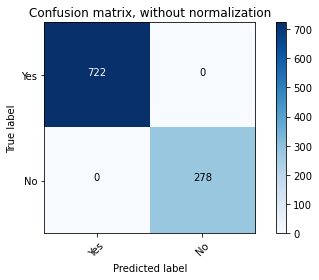

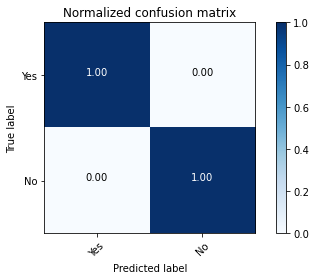

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [107]:
#print(classification_report(y, model.predict(X)))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00       722
         Yes       1.00      1.00      1.00       278

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



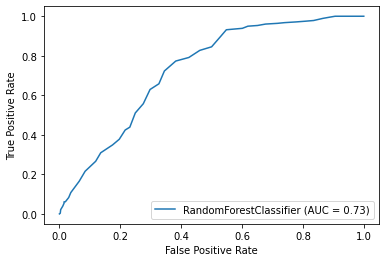

In [108]:
plot_roc_curve(clf, X_test, y_test)


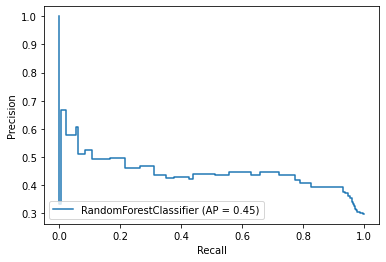

In [109]:
plot_precision_recall_curve(clf, X_test, y_test)


In [144]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred_prob
)))
clf.predict_proba(X)

#print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred
#)))
#print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_true
#)))
#print('\nUsing 0.5 as threshold:')
#print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
#print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
#print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
#print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))

#print('\nClassification Report')
#print(classification_report(y_test, test_pred))


Log loss = 0.03146


array([[0.5 , 0.5 ],
       [0.43, 0.57],
       [0.72, 0.28],
       ...,
       [0.64, 0.36],
       [0.3 , 0.7 ],
       [0.34, 0.66]])

30


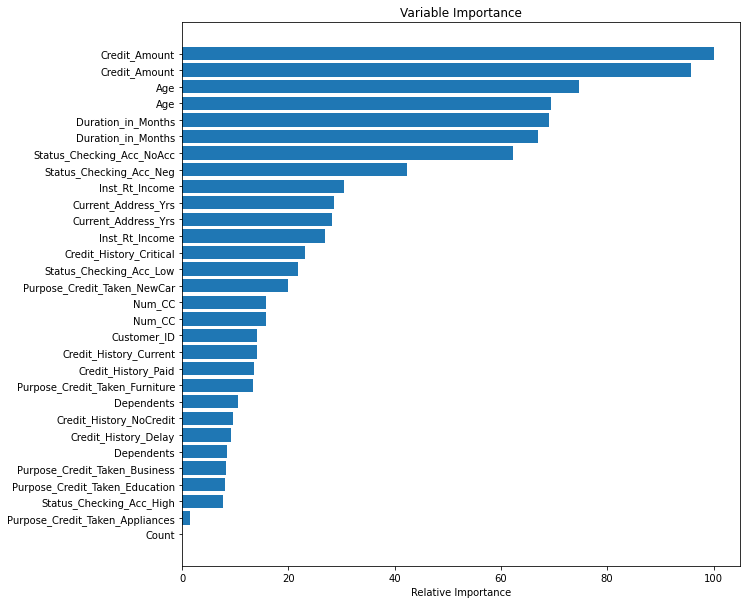

In [111]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()